In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import seaborn as sns
import hvplot.pandas

In [3]:
state_population = pd.read_csv("../data/CLEAN_regionpopulation.csv")
state_population = pd.DataFrame(state_population)
state_population.head()

,State,2022 Population Estimate,Region
0,Connecticut,3626205,Northeast
1,Maine,1385340,Northeast
2,Massachusetts,6981974,Northeast
3,New Hampshire,1395231,Northeast
4,New Jersey,9261699,Northeast


In [4]:
northeast_df = state_population[state_population['Region'] == 'Northeast']
midwest_df = state_population[state_population['Region'] == 'Midwest']
south_df = state_population[state_population['Region'] == 'South']
west_df = state_population[state_population['Region'] == 'West']

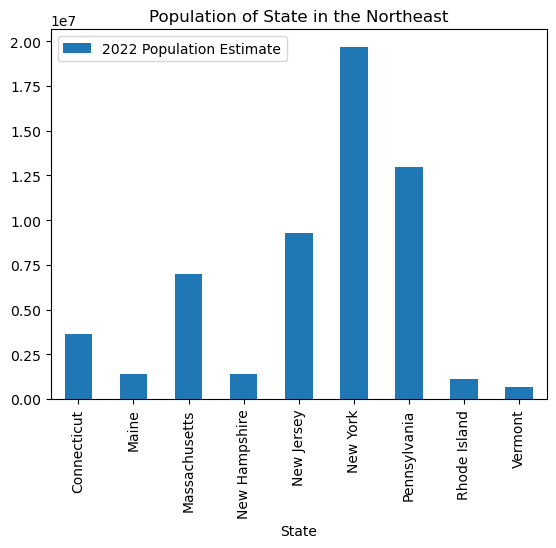

In [5]:
northeast_bargraph = northeast_df.plot(kind='bar', x='State', y='2022 Population Estimate', title = 'Population of State in the Northeast')
plt.show()

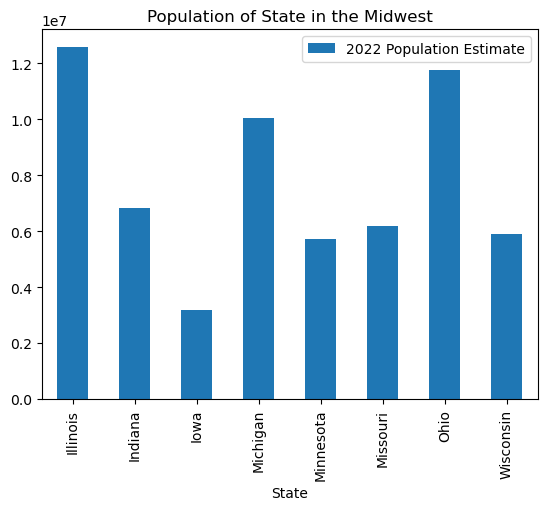

In [6]:
midwest_df.plot(kind='bar', x='State', y='2022 Population Estimate', title = 'Population of State in the Midwest')
plt.show()

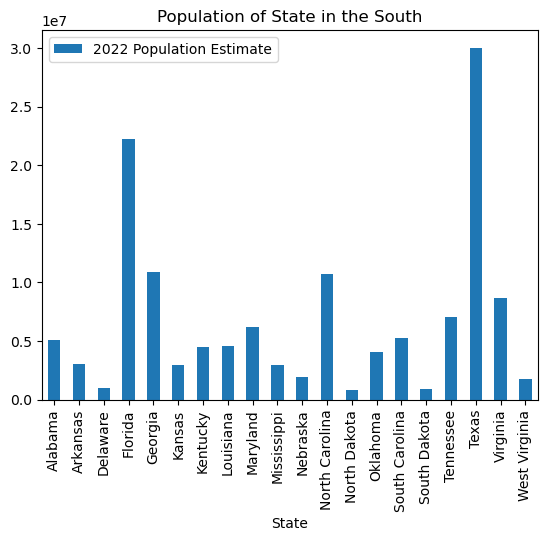

In [7]:
south_df.plot(kind='bar', x='State', y='2022 Population Estimate', title = 'Population of State in the South')
plt.show()

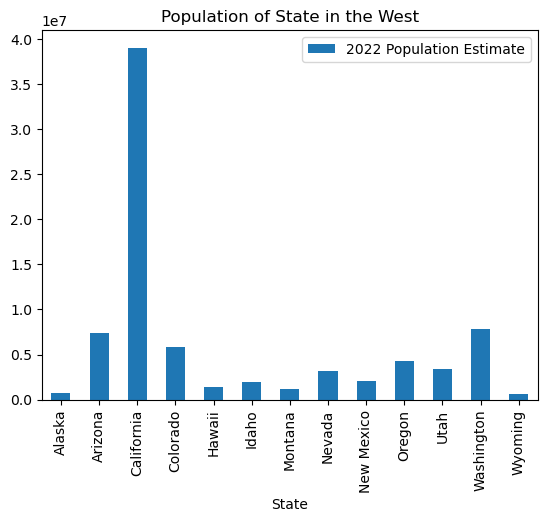

In [8]:
west_df.plot(kind='bar', x='State', y='2022 Population Estimate', title = 'Population of State in the West')
plt.show()

In [31]:
medium_state = pd.read_csv('../data/medium_state_rows.csv')
medium_state_df = pd.DataFrame(medium_state)
medium_state_df.columns

Index(['State', '2022 Population Estimate', 'Region',
       'Total doses distributed', 'Total doses administered by jurisdiction',
       'Residents with at least one dose',
       'Percent of total pop with at least one dose',
       'Residents 18+ with a completed primary series',
       'Residents 65+ with at least one dose',
       'Residents 65+ with a completed primary series',
       'Residents 12+ with at least one dose',
       'Residents 12+ with a completed primary series',
       'Residents 5+ with at least one dose',
       'Residents 5+ with a completed primary series', 'Data As Of',
       'Start Date', 'End Date', 'Sex', 'Age Group', 'COVID-19 Deaths',
       'Total Deaths', 'Pneumonia and COVID-19 Deaths'],
      dtype='object')

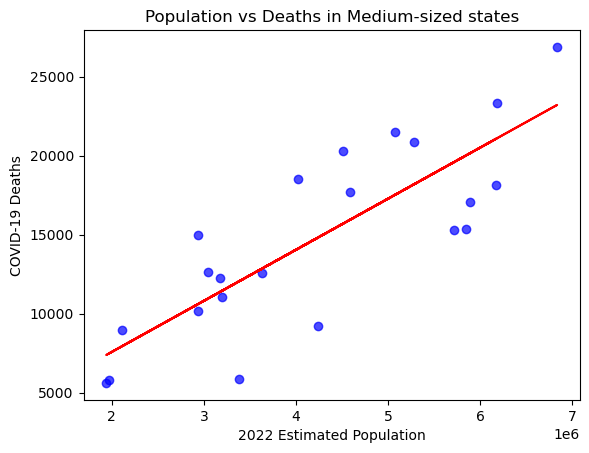

T-statistic: 13.190842858104796, p-value: 1.5743727396931743e-16


In [29]:
slope, intercept = np.polyfit(medium_state_df['2022 Population Estimate'], medium_state_df['COVID-19 Deaths'], 1)
plt.scatter(medium_state_df['2022 Population Estimate'], medium_state_df['COVID-19 Deaths'], color='blue', alpha=0.7)
plt.plot(medium_state_df['2022 Population Estimate'], intercept + slope * medium_state_df['2022 Population Estimate'], color='red')
plt.title('Population vs Deaths in Medium-sized states')
plt.xlabel('2022 Estimated Population')
plt.ylabel('COVID-19 Deaths')
plt.show()
#Shows the percent of people who died of COVID-19 will be higher in more highly populated states than in less populated states.
t_stat, p_value = stats.ttest_ind(medium_state_df['2022 Population Estimate'], medium_state_df['COVID-19 Deaths'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")


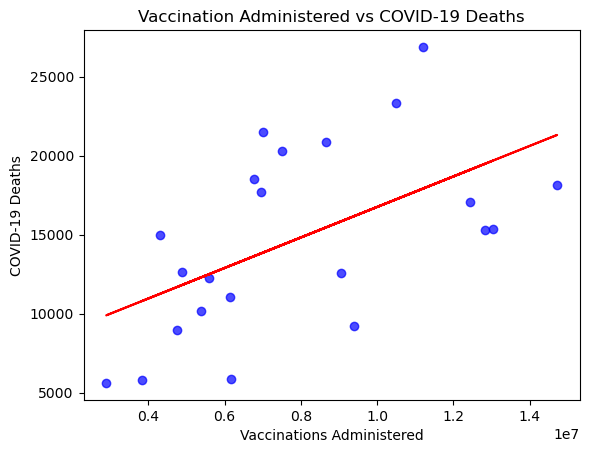

T-statistic: 11.088778931596387, p-value: 4.693029086616074e-14


In [30]:
slope, intercept = np.polyfit(medium_state_df['Total doses administered by jurisdiction'], medium_state_df['COVID-19 Deaths'], 1)
plt.scatter(medium_state_df['Total doses administered by jurisdiction'], medium_state_df['COVID-19 Deaths'], color='blue', alpha=0.7)
plt.plot(medium_state_df['Total doses administered by jurisdiction'], intercept + slope * medium_state_df['Total doses administered by jurisdiction'], color='red')
plt.title('Vaccination Administered vs COVID-19 Deaths')
plt.xlabel('Vaccinations Administered')
plt.ylabel('COVID-19 Deaths')
plt.show()
t_stat, p_value = stats.ttest_ind(medium_state_df['Total doses administered by jurisdiction'], medium_state_df['COVID-19 Deaths'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

In [32]:
medium_state_df.set_index('State', inplace=True)
medium_state_df.head()

,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
State,,,,,,,,,,,,,,,,,,,,,
Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,4152915,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0
Iowa,3200517,Midwest,9429185,6131087,2235485,70.9,1818244,564406,532779,2126967,...,2215662,2024863,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,11026.0,125759.0,4065.0
Minnesota,5717184,Midwest,18519240,12829141,4461994,79.1,3533102,975356,919278,4143519,...,4390824,4039371,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,15298.0,188637.0,5610.0
Missouri,6177957,Midwest,15654225,10509024,4269469,69.6,3276112,1058140,943084,4082773,...,4236460,3615520,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23363.0,273827.0,11052.0


array([<Axes: ylabel='Connecticut'>], dtype=object)

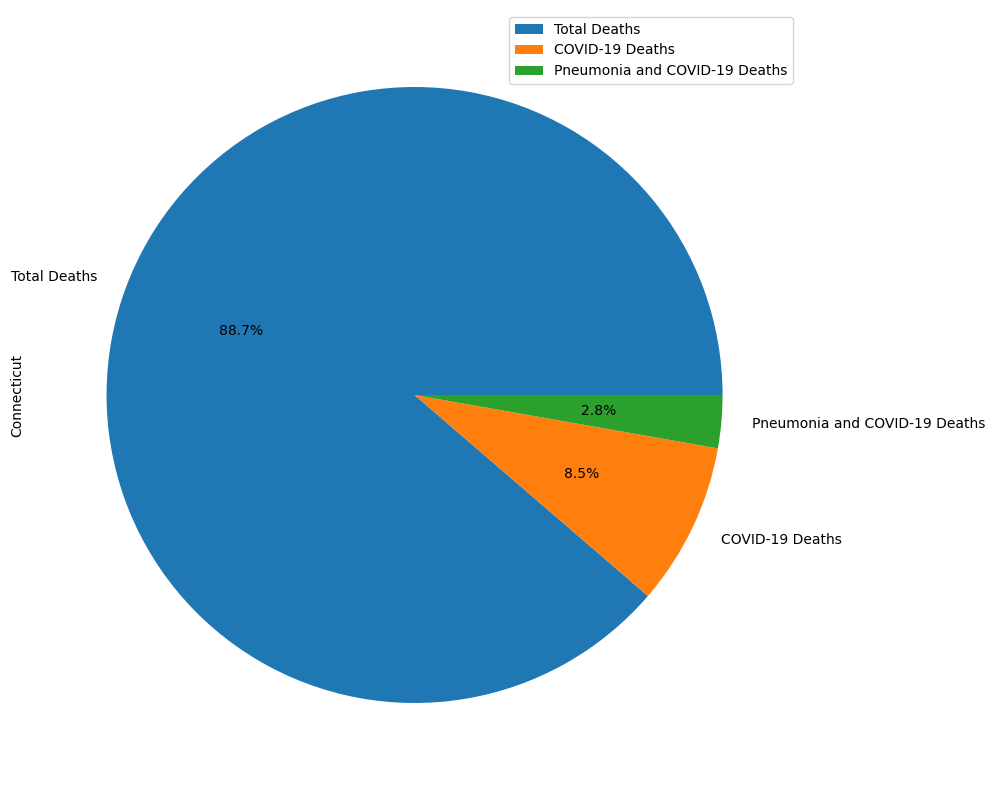

In [61]:
medium_pie_df = medium_state_df[['Total Deaths', 'COVID-19 Deaths', "Pneumonia and COVID-19 Deaths"]]
filteredrow_df = medium_pie_df.iloc[0]
filteredrow_df
filteredrow_df.T.plot.pie(subplots=True, figsize=(20,10), autopct='%1.1f%%', legend=True)


In [64]:
smallstate = pd.read_csv('../data/small_state_rows.csv')
smallstate_df = pd.DataFrame(smallstate)

array([<Axes: ylabel='Maine'>], dtype=object)

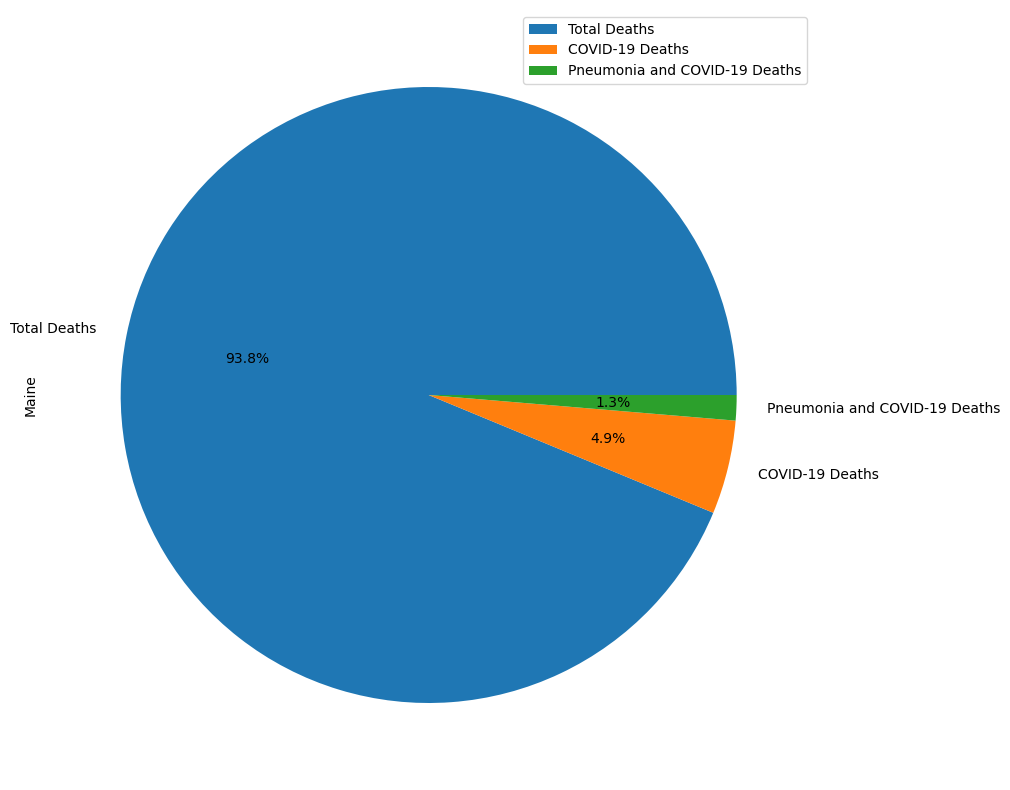

In [65]:
smallstate_df.set_index('State', inplace=True)
smallstate_pie_df = smallstate_df[['Total Deaths', 'COVID-19 Deaths', "Pneumonia and COVID-19 Deaths"]]
smallfilteredrow_df = smallstate_pie_df.iloc[0]
smallfilteredrow_df.T.plot.pie(subplots=True, figsize=(20,10), autopct='%1.1f%%',legend=True)

array([<Axes: ylabel='Connecticut'>], dtype=object)

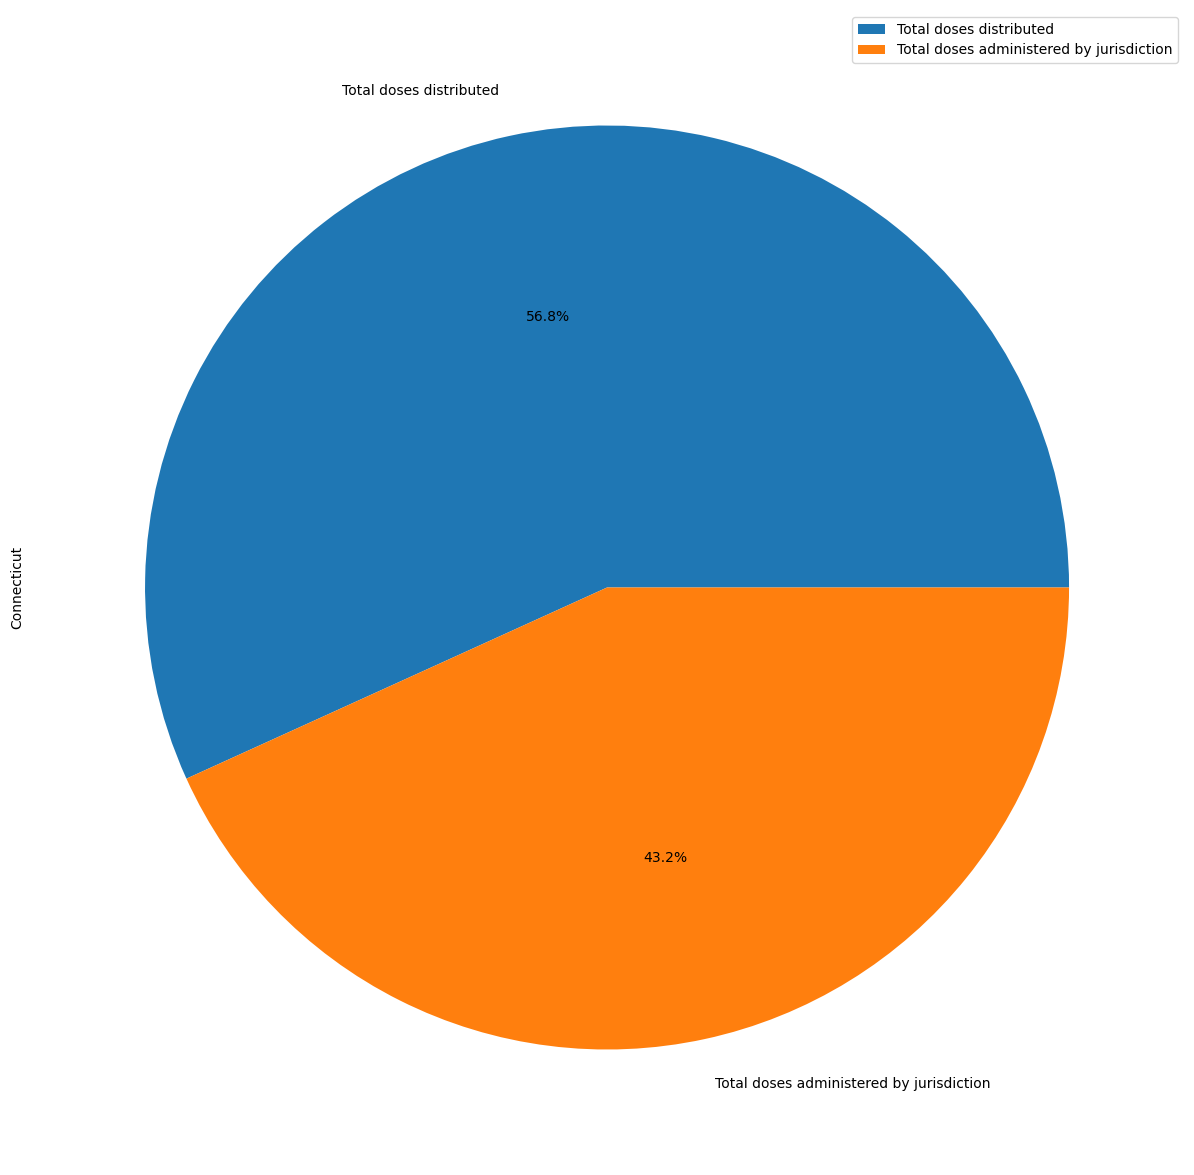

In [76]:
medium_state_df.head()
medium_pie3 = medium_state_df[['Total doses distributed', 'Total doses administered by jurisdiction']]
mediumpie3filteredrow_df = medium_pie3.iloc[0:1]
mediumpie3filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%', legend=True)

array([<Axes: ylabel='Connecticut'>], dtype=object)

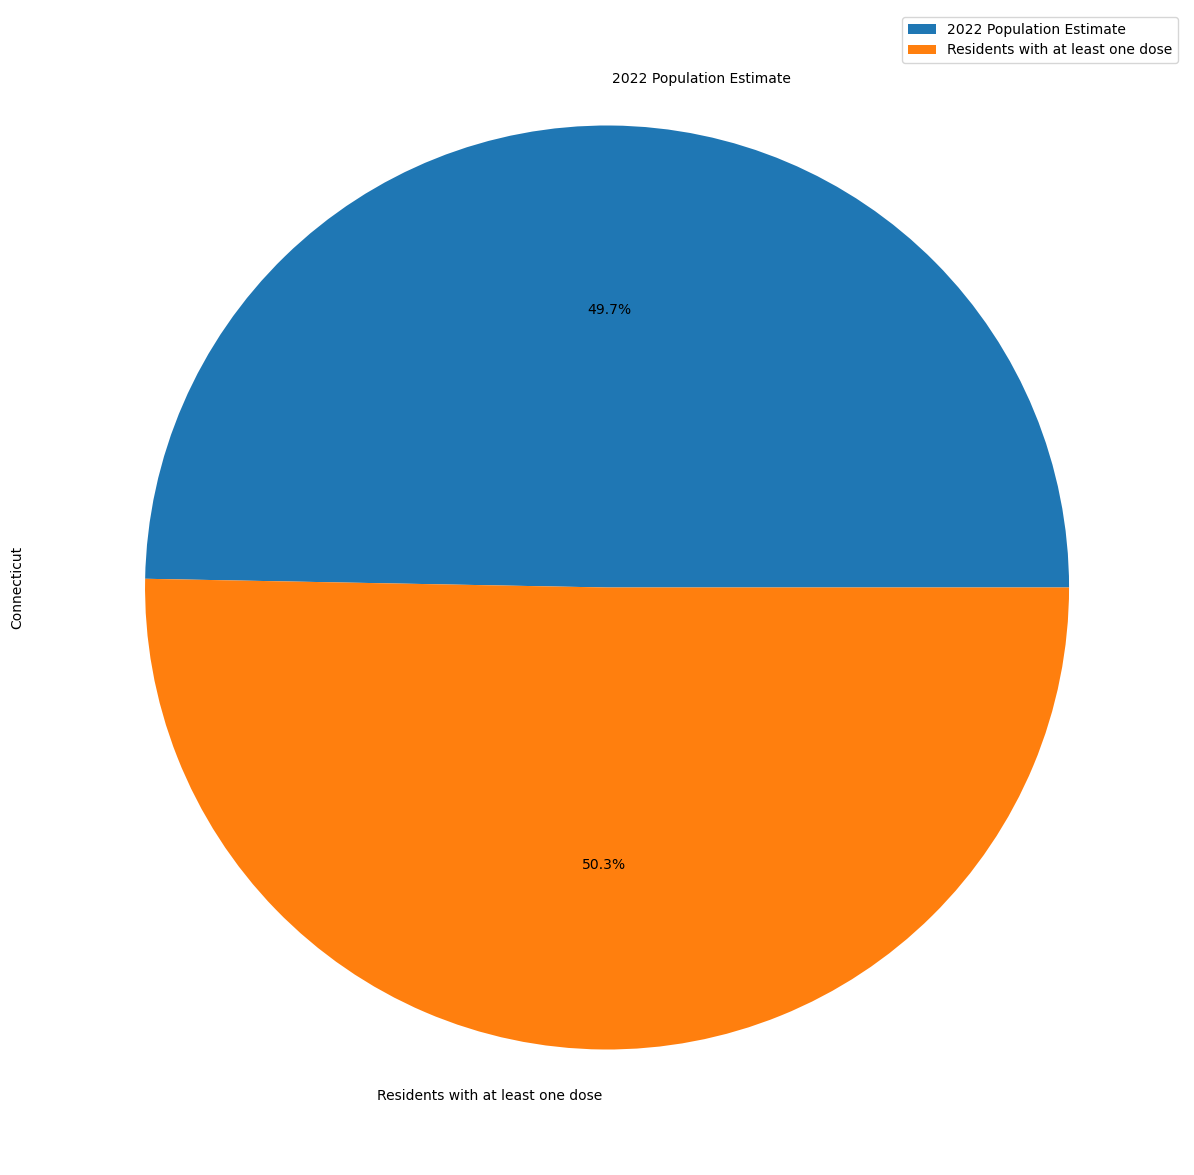

In [80]:
medium_pie4 = medium_state_df[['2022 Population Estimate', 'Residents with at least one dose']]
mediumpie4filteredrow_df = medium_pie4.iloc[0:1]
mediumpie4filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%', legend=True)